In [1]:
from caption.config import config, flickr8k_opts, vgg16_opts, inceptionv3_opts, efficientnet_opt
from caption.utils import usage
from caption.models    import Flickr8k, VGG16, InceptionV3, EfficientNetB0, Encoder, Decoder, BahdanauAttention
from caption import utils
from keras.backend import clear_session

usage()

2022-10-02 09:31:09.598113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 09:31:09.781306: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-02 09:31:09.842181: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-02 09:31:10.873509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 


________                               _______________
___  __/__________________________________  ____/__  /________      __
__  /  _  _ \_  __ \_  ___/  __ \_  ___/_  /_   __  /_  __ \_ | /| / /
_  /   /  __/  / / /(__  )/ /_/ /  /   _  __/   _  / / /_/ /_ |/ |/ / 
/_/    \___//_/ /_//____/ \____//_/    /_/      /_/  \____/____/|__/  

----------------------------------------------------------------------

Version        : #235-Ubuntu SMP Tue Feb 2 02:49:08 UTC 2021
Python         : 3.9.10
Tensorflow     : 2.10.0
Numpy          : 1.23.2
CUDA Available : yes
GPU Available  : yes
Eager Execution: yes


2022-10-02 09:31:13.493404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 09:31:17.936474: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3878 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:00:07.0, compute capability: 7.0
2022-10-02 09:31:17.937953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 3878 MB memory:  -> device: 1, name: Tesla V100-PCIE-32GB, pci bus id: 0000:00:08.0, compute capability: 7.0
2022-10-02 09:31:17.940197: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/repli

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

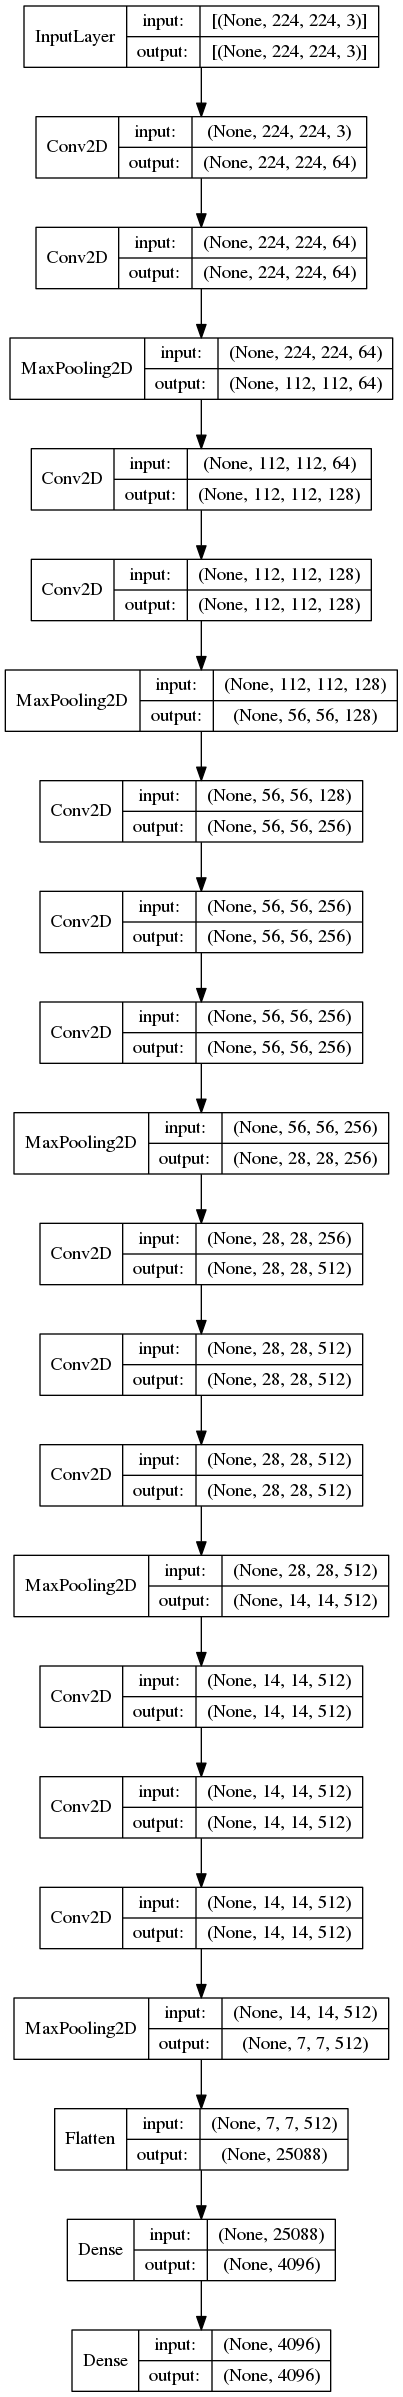

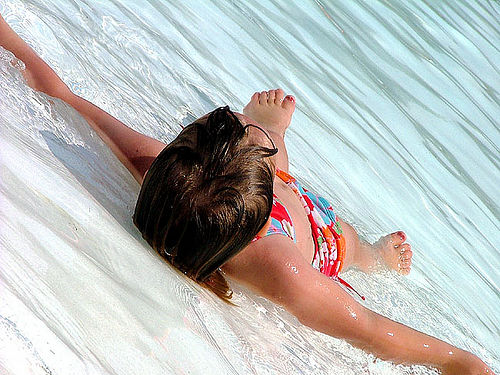

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


* Dataset::__init__()
* LoadData()
- prepare_mapping_data()
- load_doc(datasets/Flickr8k/Flickr8k.token.txt)
- load_descriptions()
  Loaded: 8092 
ZMQInteractiveShell


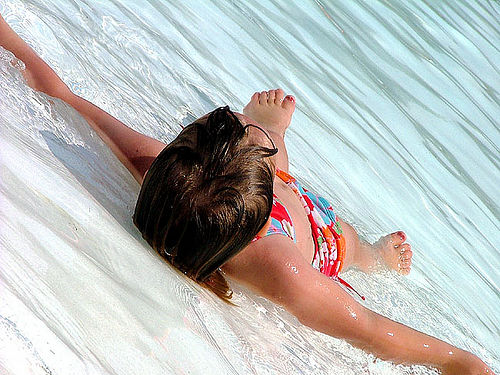

[
    "A girl is stretched out in shallow water",
    "A girl wearing a red and multi-colored bikini is laying on her back in shallow water .",
    "A little girl in a red swimsuit is laying on her back in shallow water .",
    "A young girl is lying in the sand , while ocean water is surrounding her .",
    "Girl wearing a bikini lying on her back in a shallow pool of clear blue water ."
]
- clean_descriptions()
- to_vocabulary()
  Vocabulary Size: 8763 
- save_descriptions(files/mapping_flickr8k_vgg16.txt)
[
    "girl is stretched out in shallow water",
    "girl wearing red and multicolored bikini is laying on her back in shallow water",
    "little girl in red swimsuit is laying on her back in shallow water",
    "young girl is lying in the sand while ocean water is surrounding her",
    "girl wearing bikini lying on her back in shallow pool of clear blue water"
]
- load_set(datasets/Flickr8k/Flickr_8k.trainImages.txt)
- load_doc(datasets/Flickr8k/Flickr_8k.trainImages.txt)
- load_

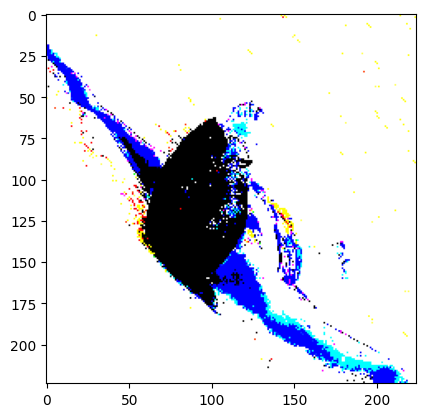

In [2]:
#model = InceptionV3.v1 (config, flickr8k_opts, inceptionv3_v1_opts, data)
#encoder   = Encoder.CNN(Config)
#attention = BahdanauAttention.Attention(Config)
#decoder   = Decoder.RNN(Config, data, attention)
model = VGG16.v1 (config, flickr8k_opts, vgg16_opts)
#model = EfficientNetB0.v1 (config, flickr8k_opts, efficientnet_opt)

In [3]:
#model = InceptionV3.CNN(Config, InceptionV3Opts, data)
#model.load_data ()
#dataset = Flickr8k.Dataset(flickr8k_opts, vgg16_v2_opts, True)
#data  = dataset.LoadData ()

In [4]:
#clear_session()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 256)      1940224     ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 4096)         0           ['input_2[0][0]']                
                                                                                            

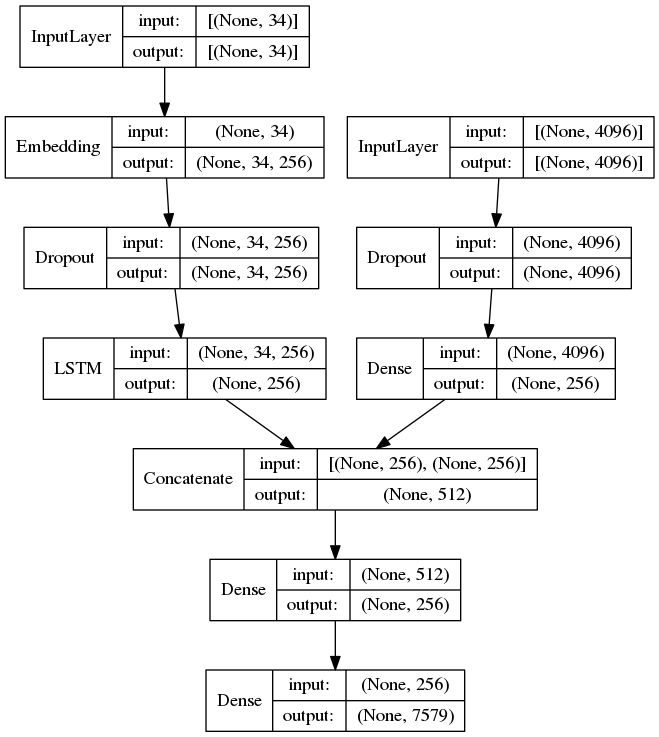

In [5]:
model.Model1 ()

In [ ]:
model.Fit ()

Epoch 1/50


2022-10-02 09:31:29.684238: W tensorflow/core/common_runtime/forward_type_inference.cc:332] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_40/output/_23'


188/188 [==============================] - ETA: 0s - loss: 5.2730
Epoch 1: val_loss improved from inf to 4.45383, saving model to models/rnn_model_1_vgg16_ep50.h5
188/188 [==============================] - 48s 227ms/step - loss: 5.2730 - val_loss: 4.4538
Epoch 2/50
 90/188 [=============>................] - ETA: 16s - loss: 4.2681

In [ ]:
model.Evaluate ()

In [ ]:
model.EvaluateBeamSearch ()

In [ ]:
model.Generate ()